In [1]:
from get_mesh_modes import *
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# needed to prevent 3d plots from rendering really small
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None} 

In [2]:
# load vertices and faces for triangular meshes with two different resolutions
verts3 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/mean_nuc_mesh_uniform_3_vertices.npy')
faces3 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/mean_nuc_mesh_uniform_3_faces.npy')
verts4 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/mean_nuc_mesh_uniform_4_vertices.npy')
faces4 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/mean_nuc_mesh_uniform_4_faces.npy')
verts45 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/mean_nuc_mesh_uniform_4.5_vertices.npy')
faces45 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/mean_nuc_mesh_uniform_4.5_faces.npy')
verts5 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/mean_nuc_mesh_uniform_5_vertices.npy')
faces5 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/mean_nuc_mesh_uniform_5_faces.npy')

verts1060 = np.load('nucleus_mesh_data/marching_cubes_meshes/verts_1060.npy')
faces1060 = np.load('nucleus_mesh_data/marching_cubes_meshes/faces_1060.npy')
verts2538 = np.load('nucleus_mesh_data/marching_cubes_meshes/verts_2538.npy')
faces2538 = np.load('nucleus_mesh_data/marching_cubes_meshes/faces_2538.npy')

In [3]:
def view_mesh_nma_results(verts, faces, save_flag=False, fname=None, bins=None):
    """For a given mesh, scatterplot the vertices, run the NMA code, and histplot the eigenvalues.
    :param verts: mesh vertices
    :param faces: mesh faces
    :param save_flag: T/F flag on whether to save NMA results to files
    :param fname: filename to save NMA results to (only if save_flag=True)
    :param bins: set binning for NMA eigenvalue histplot display
    :return: hessian, eigenvalues, and eigenvectors for NMA
    """
    
    # first, view the vertices of the mesh
    x = [verts[i][0] for i in range(verts.shape[0])]
    y = [verts[i][1] for i in range(verts.shape[0])]
    z = [verts[i][2] for i in range(verts.shape[0])]
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111, projection='3d')
    ax1.scatter(x,y,z)
    plt.title(str(verts.shape[0])+' Vertex Model')
    plt.show()
    
    hess, w, v = get_eigs_from_mesh(verts, faces, save_flag, fname)
    print('Eigenvalues with w < 10^-5: '+str(np.sum(w<10**-5)))
    
    sb.distplot(w, kde=False, bins=bins, label=str(verts.shape[0])+' Vertices')
    plt.xlabel('Eigenvalues')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
    
    
    return hess, w, v

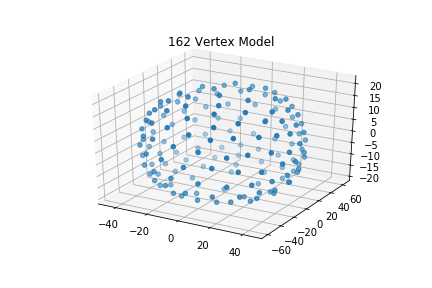

Eigenvalues with w < 10^-5: 6


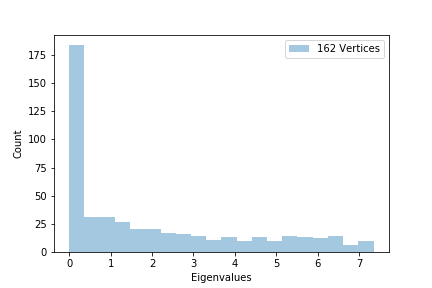

In [4]:
h3, w3, v3 = view_mesh_nma_results(verts3, faces3, save_flag=True, fname='nuc_mesh_3', bins=20)

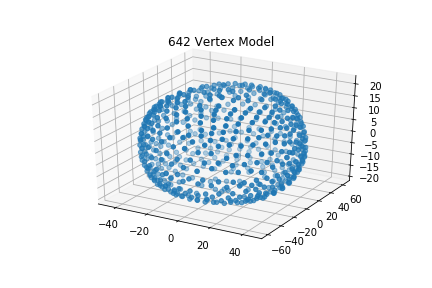

Eigenvalues with w < 10^-5: 8


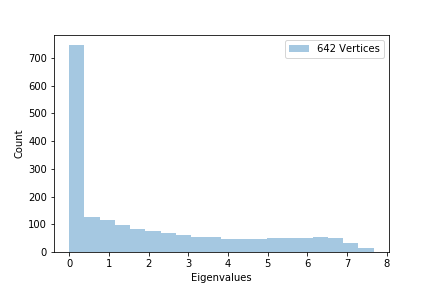

In [5]:
h4, w4, v4 = view_mesh_nma_results(verts4, faces4, save_flag=True, fname='nuc_mesh_4', bins=20)

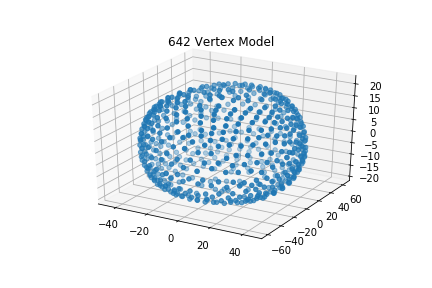

Eigenvalues with w < 10^-5: 8


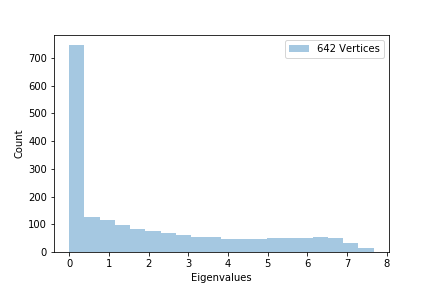

In [6]:
h45, w45, v45 = view_mesh_nma_results(verts45, faces45, save_flag=True, fname='nuc_mesh_4.5', bins=20)

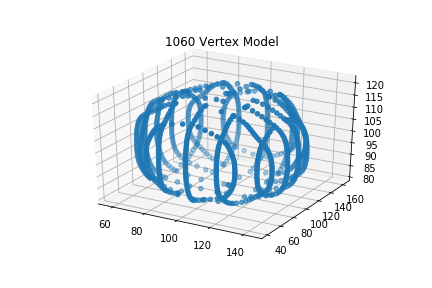

Eigenvalues with w < 10^-5: 18


/home/juliec/miniconda3/envs/trans_env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


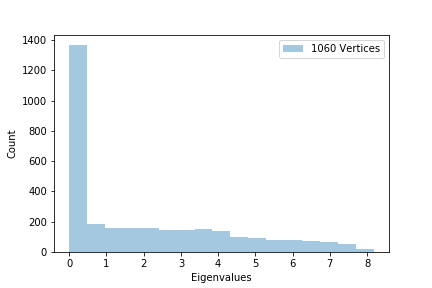

In [7]:
h1060, w1060, v1060 = view_mesh_nma_results(verts1060, faces1060, save_flag=True, fname='nuc_mesh_1060', bins=None)

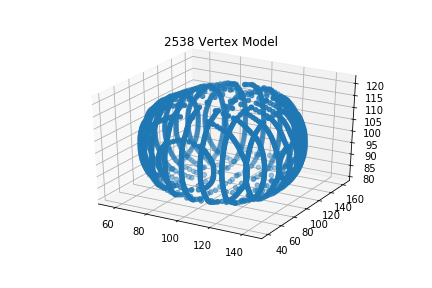

Eigenvalues with w < 10^-5: 61


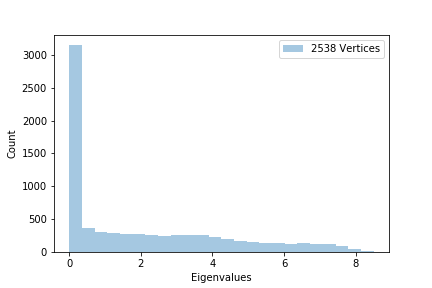

In [8]:
h2538, w2538, v2538 = view_mesh_nma_results(verts2538, faces2538, save_flag=True, fname='nuc_mesh_2538', bins=None)